# 🛢️ U.S. Oil & Gas Production and Disposition (2015–2025)

## 📘 Introduction  

Energy production is a cornerstone of the U.S. economy.  
Understanding how **oil and gas** are **produced, distributed, and consumed** over time is essential for:

- ⚙️ **Forecasting** future revenues and resource needs  
- 🛠️ **Identifying inefficiencies** or losses in production  
- 🧭 **Guiding data-driven energy and environmental policies**

This project analyzes monthly oil and gas data published by the  
**Office of Natural Resources Revenue (ONRR)**, covering activity across  
**all U.S. states and offshore regions** from **2015 to 2025**.

Our main goals are to explore and model this data to answer key questions, such as:

- 📈 How has U.S. oil and gas production changed over the past decade?  
- 🧩 What economic, geographic, or operational factors influence production trends?  
- 🤖 Can we build models to **forecast production volumes** or **classify high-output regions**?

By combining **statistical analysis** and **machine learning techniques**,  
this study transforms large-scale raw energy data into **practical insights**  
that support **business planning**, **resource management**, and **policy decisions**.

## 📚 Data Dictionary

The dataset used in this project comes from the **Office of Natural Resources Revenue (ONRR)** and contains detailed records of **U.S. oil and gas production and disposition** between **2015 and 2025**.

Each record represents how much oil or gas was produced in a given month, where it came from, and what happened to it afterward.


### 🧾 What the Data Includes


| Column Name | Description |
|--------------|-------------|
| **Production Date** | The month and year when the oil or gas was produced. |
| **Land Class** | Type of land ownership where production occurred (e.g., Federal, State, Indian, Private). |
| **Land Category** | Indicates whether the production is **Onshore** or **Offshore**. |
| **State** | The U.S. state where the production activity took place. |
| **County** | The specific county or local region within the state. |
| **FIPS Code** | Federal Information Processing Standard code used to uniquely identify each county. |
| **Offshore Region** | The name or area of the offshore production zone (used when production is not tied to a state or county). |
| **Commodity** | The product being reported — **Oil (bbl)** for barrels of oil or **Gas (Mcf)** for thousand cubic feet of natural gas. |
| **Disposition Code** | Short code showing what happened to the produced commodity (e.g., sold, stored, used, lost). |
| **Disposition Description** | Text description of the disposition category (e.g., Sales, Storage, Transferred, Used, Lost). |
| **Volume** | The quantity of the commodity produced or reported for that record, measured in the appropriate unit (barrels or thousand cubic feet). |


---

## ⚖️ Units and Conversion Metrics

To keep production data consistent and comparable across different measurement systems,  
we use a **simple set of standard conversion factors** throughout the project.

| Conversion | Formula | Explanation |
|-------------|----------|-------------|
| **Gas → BOE** | `1 BOE = 6 MCF` | 6 thousand cubic feet (MCF) of natural gas ≈ 1 barrel of oil equivalent (BOE). |
| **Oil → Cubic Meters** | `1 m³ = 6.29 BBL` | 6.29 barrels (BBL) of crude oil = 1 cubic meter. |
| **Gas → Cubic Meters** | `1 MCF ≈ 28.3 m³` | 1 thousand cubic feet of gas = 28.3 cubic meters. |

---

### 💡 Why Use BOE?

**BOE (Barrel of Oil Equivalent)** allows oil and gas to be expressed in a single energy-based metric.  
It represents the amount of energy released by burning one barrel of crude oil.

Using BOE helps us:
- Compare **oil and gas production** on the same scale  
- Calculate **total energy output**  
- Build **unified predictive models** for both resources  

---

✅ **Note:**  
All conversions are approximate but widely accepted in the energy industry.  
They are accurate enough for large-scale production analysis and forecasting.

### 🧩1- Problem Understanding

#### 🎯 Objective
The goal of this project is to analyze and model **U.S. Oil and Gas Production & Disposition (2015–2025)** data.  
We aim to understand the main factors that drive production, forecast production trends, and identify high-producing operations across time.


#### 🏢 Business Context
Oil and gas production depends on many variables such as **commodity type**, **land ownership**, **region**, and **disposition** (sales, transfer, injection, etc.).  
Understanding these relationships helps to:
- 📈 **Forecast production** for revenue and resource planning  
- 🧭 **Detect underperforming regions or assets**  
- 🛢️ **Support strategic decisions** for drilling and management  


#### 🤖 Modeling Approach
This project uses two complementary analytical methods:

| Task | Target Variable | Goal | Method | Output Type |
|------|-----------------|------|--------|--------------|
| **Time Series Forecasting** | `Volume BOE` | Forecast future production volumes over time | ARIMA / SARIMA | Continuous (temporal) |
| **Classification** | `Is High Producer` | Identify operations that are high-producing (top 5%) | Random Forest / XGBoost | Binary label (0/1) |


#### 🔍 Key Questions
- How has oil and gas production evolved over time?  
- What temporal patterns or seasonality can be identified?  
- Can we accurately **forecast production volumes** using time-series models?  
- Which factors or time-based features signal **high-producing regions**?  


#### 📊 Expected Outcomes
- A **time-series forecasting model** to predict future production trends  
- A **classification model** to flag high-producing operations  
- Insights into the **key drivers** influencing production over time  
- **Explainable and interpretable results** using feature importance and SHAP analysis  


### 🧩2- Data Understanding & Exploration

In [1]:
import time, re, warnings, joblib
import numpy as np                   
import pandas as pd 

import matplotlib.pyplot as plt        
import seaborn as sns     

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)

from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB

warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)   
sns.set_style('whitegrid')     

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')

#####  ***📥 Load the Dataset and Preview***

In [2]:
# Load the dataset
df = pd.read_csv("data.csv")

# Preview the first few rows
df.head()

,Production Date,Land Class,Land Category,State,County,FIPS Code,Offshore Region,Commodity,Disposition Code,Disposition Description,Volume
0,01/01/2015,Federal,Offshore,NaN,NaN,NaN,Offshore Alaska,Gas (Mcf),1,Sales-Royalty Due-MEASURED,0
1,01/01/2015,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Gas (Mcf),1,Sales-Royalty Due-MEASURED,"14,508,756"
2,01/01/2015,Federal,Offshore,NaN,NaN,NaN,Offshore Pacific,Gas (Mcf),1,Sales-Royalty Due-MEASURED,"1,207,520"
3,01/01/2015,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Gas (Mcf),4,Sales-Royalty Due-Not Measured,"487,324"
4,01/01/2015,Federal,Offshore,NaN,NaN,NaN,Offshore Pacific,Gas (Mcf),4,Sales-Royalty Due-Not Measured,"114,808"


#####  ***🧾 Check Column Names***

In [3]:
print(df.columns.tolist())

['Production Date', 'Land Class', 'Land Category', 'State', 'County', 'FIPS Code', 'Offshore Region', 'Commodity', 'Disposition Code', 'Disposition Description', 'Volume']


#####  ***🧾 Dataset shape***

In [4]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 470830
Number of columns: 11


##### ***🧩 Basic Information: Data Types, Descriptive Statistics, Uniques and Missing Values by column***

In [5]:
# Concise summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470830 entries, 0 to 470829
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Production Date          470830 non-null  object 
 1   Land Class               470830 non-null  object 
 2   Land Category            470830 non-null  object 
 3   State                    454200 non-null  object 
 4   County                   454200 non-null  object 
 5   FIPS Code                454200 non-null  float64
 6   Offshore Region          10196 non-null   object 
 7   Commodity                470830 non-null  object 
 8   Disposition Code         470830 non-null  int64  
 9   Disposition Description  470830 non-null  object 
 10  Volume                   470830 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 39.5+ MB


In [6]:
# Descriptive statistics
df.describe()

,FIPS Code,Disposition Code
count,"454,200.000","470,830.000"
mean,"33,246.875",18.446
std,"16,471.270",14.211
min,"1,003.000",1.000
25%,"22,027.000",10.000
50%,"35,045.000",17.000
75%,"48,225.000",25.000
max,"56,045.000",69.000


In [7]:
# Unique values by columns
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count}")

Production Date: 125
Land Class: 3
Land Category: 2
State: 27
County: 318
FIPS Code: 363
Offshore Region: 3
Commodity: 2
Disposition Code: 35
Disposition Description: 35
Volume: 56610


In [8]:
# Missing values by columns 
df.isna().sum()

Production Date                 0
Land Class                      0
Land Category                   0
State                       16630
County                      16630
FIPS Code                   16630
Offshore Region            460634
Commodity                       0
Disposition Code                0
Disposition Description         0
Volume                          0
dtype: int64

#####  ***🗓️ Convert Columns to the Right Data Types***

In [9]:
# Convert 'Production Date' column to proper datetime format (if not already)
df['Production Date'] = pd.to_datetime(df['Production Date'], errors='coerce')

# Clean and convert 'Volume' column to numeric
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

# Convert ID Columns to object
id_cols = ['FIPS Code', 'Disposition Code']

for col in id_cols:
    if col in df.columns:
        df[col] = df[col].astype('object')

In [10]:
df.dtypes

Production Date            datetime64[ns]
Land Class                         object
Land Category                      object
State                              object
County                             object
FIPS Code                          object
Offshore Region                    object
Commodity                          object
Disposition Code                   object
Disposition Description            object
Volume                            float64
dtype: object

### 🧩3- Data Cleaning & Preparation
The goal of this step is to ensure the dataset is **clean, consistent, and ready for modeling**.  
We will fix data quality issues such as missing values, inconsistent types, duplicates, and outliers.

##### ***Drop ID Columns (not useful for modeling)***

In [11]:
df = df.drop(columns=id_cols, errors="ignore")
print("✅ Removed non-informative ID columns: FIPS Code and Disposition Code")

✅ Removed non-informative ID columns: FIPS Code and Disposition Code


##### ***Check Summary Report of missing values***

In [12]:
missing_count = df.isna().sum()                 
missing_percent = (df.isna().mean() * 100).round(2) 

missing_report = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

missing_report

,Missing Count,Missing %
Offshore Region,460634,97.830
State,16630,3.530
County,16630,3.530
Production Date,0,0.000
Land Class,0,0.000
Land Category,0,0.000
Commodity,0,0.000
Disposition Description,0,0.000
Volume,0,0.000


#####  ***🚧 Apply Missing Value Threshold Rule to drop columns***

To maintain data quality, we remove columns with **too many missing values**.  
If a column has more than **40% missing data**, it is considered unreliable and dropped from the dataset.

This prevents noisy or incomplete features from negatively impacting model performance.

In [13]:
threshold = 0.4 # Threshold choosen 

# Drop columns exceeding % threshold missing values
missing_ratio = df.isna().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index
df = df.drop(columns=cols_to_drop)
print(f"🗑️ Dropped columns (>{threshold*100:.0f}% missing): {list(cols_to_drop)}")

🗑️ Dropped columns (>40% missing): ['Offshore Region']


##### ***🧩  Fill Missing Categorical Values with a Placeholder***

In [14]:
cols = ['State','County']
for col in cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')
print("✅ Columns 'State' & 'County' filled with 'Unknown' ")

✅ Columns 'State' & 'County' filled with 'Unknown' 


##### ***✔️ Verification of missing values after dropping and filling columns***

In [15]:
missing_count = df.isna().sum()                 
missing_percent = (df.isna().mean() * 100).round(2) 

missing_report = pd.DataFrame({
    'Missing Count After Verification': missing_count,
    'Missing % After Verification': missing_percent
}).sort_values(by='Missing % After Verification', ascending=False)

missing_report

,Missing Count After Verification,Missing % After Verification
Production Date,0,0.000
Land Class,0,0.000
Land Category,0,0.000
State,0,0.000
County,0,0.000
Commodity,0,0.000
Disposition Description,0,0.000
Volume,0,0.000


We can see that the dataset doesn't contain any missing values anymore

##### ***🔍 Detect Duplicates rows in dataset and Remove***

In [16]:
df.columns

Index(['Production Date', 'Land Class', 'Land Category', 'State', 'County',
       'Commodity', 'Disposition Description', 'Volume'],
      dtype='object')

In [17]:
keys = list(df.columns)

# Detect duplicates based on those keys
duplicates = df[df.duplicated(subset=keys, keep=False)]

print(f"🔍 Found {duplicates.shape[0]} true duplicate rows based on key business fields.")

# Remove 
df = df.drop_duplicates(subset=keys).reset_index(drop=True)
print("✅ True duplicates removed — dataset is now unique per production record.")

🔍 Found 3390 true duplicate rows based on key business fields.
✅ True duplicates removed — dataset is now unique per production record.


##### ***📍 Outlier detection & Capping***

In [18]:
# Compute Interquartile Range
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
print("✅ Interquartile Range:", IQR)

# Define upper & lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"✅ (lower bound, upper bound): ({lower_bound},{upper_bound})")

# Create an outlier flag
df['Volume Outlier'] = (df['Volume'] < lower_bound) | (df['Volume'] > upper_bound)

# Cap extreme values instead of dropping
df['Volume Capped'] = df['Volume'].clip(lower=lower_bound, upper=upper_bound)

# Quick check
print(f"🚨 Outliers detected: {df['Volume Outlier'].sum():,}")


✅ Interquartile Range: 165.0
✅ (lower bound, upper bound): (-247.5,412.5)
🚨 Outliers detected: 109,299


### 🧩4- Exploratory Data Analysis (EDA)
The goal of **Exploratory Data Analysis (EDA)** is to **understand the data before modeling**.  
We explore how key variables behave, identify patterns, and detect possible data quality issues.

##### ***Volume: Boxplot to Visualize Outliers (Raw vs Log transformed): For visualization***

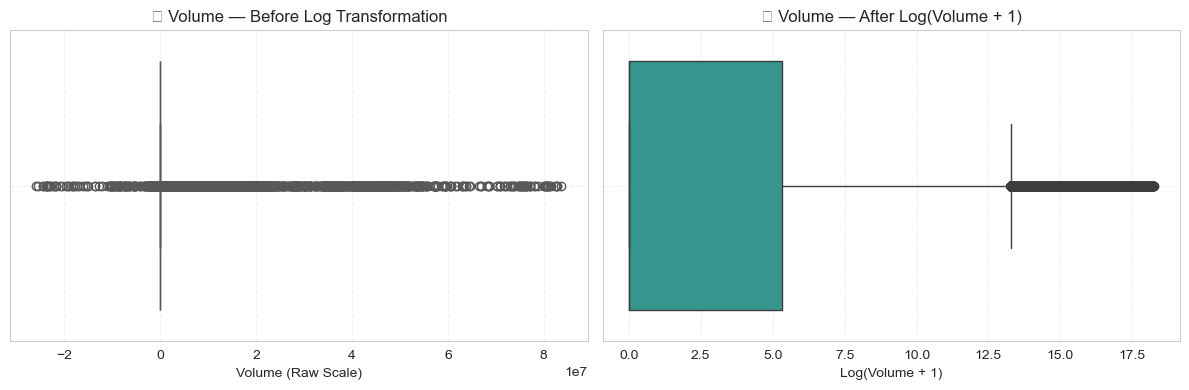

In [19]:
plt.figure(figsize=(12, 4))

# 1️⃣ Regular Volume
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Volume'], color='#FFA726')  # warm orange
plt.title("📦 Volume — Before Log Transformation")
plt.xlabel("Volume (Raw Scale)")
plt.grid(alpha=0.3, linestyle='--')

# 2️⃣ Log-Transformed Volume
plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df['Volume']), color='#26A69A')  # teal green
plt.title("📦 Volume — After Log(Volume + 1)")
plt.xlabel("Log(Volume + 1)")
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

- The **left boxplot** displays the raw `Volume` distribution, which is **highly skewed** — a few very large production values dominate the scale.  
- The **right boxplot** shows the `Log(Volume + 1)` transformation, where extreme values are **compressed**, revealing a clearer and more balanced spread of data.  
- ✅ **Key takeaway:** The log transformation doesn’t remove outliers but **reduces their visual and statistical impact**, making the data easier to model and interpret for regression tasks.

##### ***Volume: Distribution (Raw vs Log transformed): For visualization***

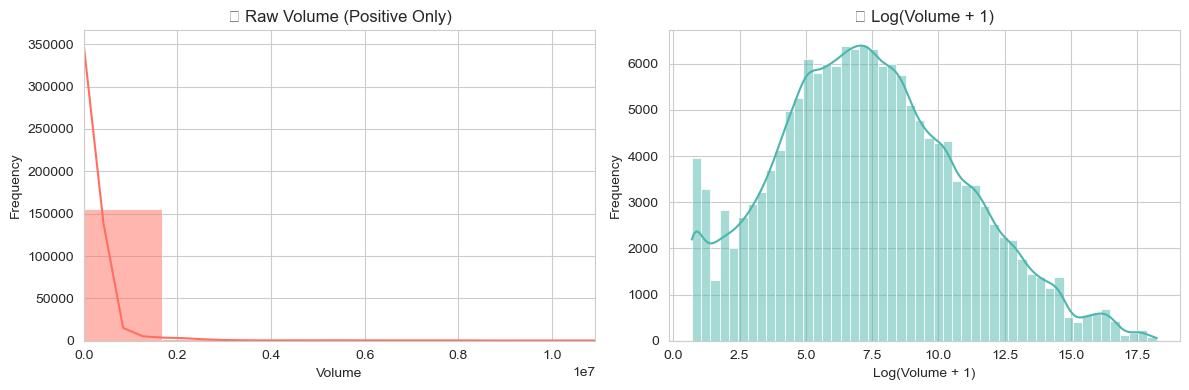

In [20]:
# Filter positive values and create log column
df_pos = df[df['Volume'] > 0].copy()
df_pos['Log Volume'] = np.log1p(df_pos['Volume'])


# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Raw Volume
sns.histplot(df_pos['Volume'], bins=50, kde=True, color="#FF6F61", ax=axes[0])
axes[0].set_title("📉 Raw Volume (Positive Only)")
axes[0].set_xlabel("Volume")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(0, df_pos['Volume'].quantile(0.99))

# Log Volume
sns.histplot(df_pos['Log Volume'], bins=50, kde=True, color="#4DB6AC", ax=axes[1])
axes[1].set_title("📈 Log(Volume + 1)")
axes[1].set_xlabel("Log(Volume + 1)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

- The **raw volume distribution** (left) is **heavily right-skewed**, meaning most production values are very small while a few records have extremely large volumes.  
- After applying a **log transformation** (right), the data becomes **more balanced and continuous**, revealing the underlying distribution of typical production values.  
- This transformation reduces the influence of outliers and makes the data more suitable for **statistical modeling** and **regression analysis**.

💡 **Key takeaway:**  
Log scaling helps uncover meaningful production patterns that were hidden by extreme volume differences.

##### ***Volume: Density plot (KDE)(Raw vs Log transformed): For visualization***

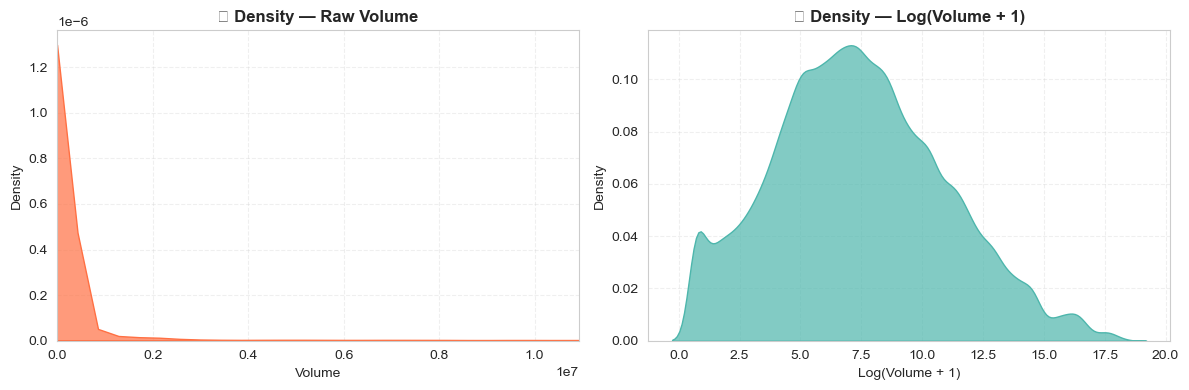

In [21]:
# Create figure
plt.figure(figsize=(12, 4))

# 1️⃣ Raw Volume Density
plt.subplot(1, 2, 1)
sns.kdeplot(df_pos['Volume'], fill=True, color='#FF7043', alpha=0.7)
plt.title("📉 Density — Raw Volume", fontsize=12, fontweight='bold')
plt.xlabel("Volume")
plt.ylabel("Density")
plt.xlim(0, df_pos['Volume'].quantile(0.99))
plt.grid(alpha=0.3, linestyle='--')

# 2️⃣ Log(Volume + 1) Density
plt.subplot(1, 2, 2)
sns.kdeplot(df_pos['Log Volume'], fill=True, color='#4DB6AC', alpha=0.7)
plt.title("📈 Density — Log(Volume + 1)", fontsize=12, fontweight='bold')
plt.xlabel("Log(Volume + 1)")
plt.ylabel("Density")
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

- The **raw volume density** (left) is extremely right-skewed showing that most production records are concentrated near zero, while only a few have very high volumes.  
- After applying the **log transformation** (right), the distribution becomes smoother and more spread out, revealing multiple peaks that indicate different production intensity levels.  
- The log transformation compresses large values, allowing better visualization of the overall data structure.


##### ***Number of Positive vs Negative records***

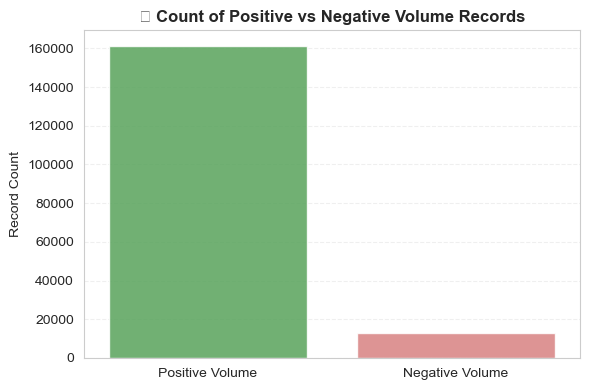

✅ Volume Sign Summary:


,Volume Type,Count
0,Positive Volume,161236
1,Negative Volume,13036


In [22]:
pos_count = (df['Volume'] > 0).sum()
neg_count = (df['Volume'] < 0).sum()

# Prepare data for plotting
counts = pd.DataFrame({
    'Volume Type': ['Positive Volume', 'Negative Volume'],
    'Count': [pos_count, neg_count]
})

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=counts,
    x='Volume Type',
    y='Count',
    palette=['#4CAF50', '#E57373'],  # green for positive, red for negative
    alpha=0.85
)
plt.title("📊 Count of Positive vs Negative Volume Records", fontsize=12, fontweight="bold")
plt.xlabel("")
plt.ylabel("Record Count")
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Print numerical summary
print("✅ Volume Sign Summary:")
display(counts)

- The bar chart shows a **large imbalance** between positive and negative volume records.  
- **Positive volumes** dominate the dataset — meaning most entries represent **actual production output**.  
- **Negative volumes**, though much smaller in number, likely correspond to **adjustments, reclassifications, or production losses** (e.g., measurement corrections or transfers).  
- The strong predominance of positive records suggests that the dataset primarily reflects normal production activity rather than corrections.

##### ***Production Trend over years***

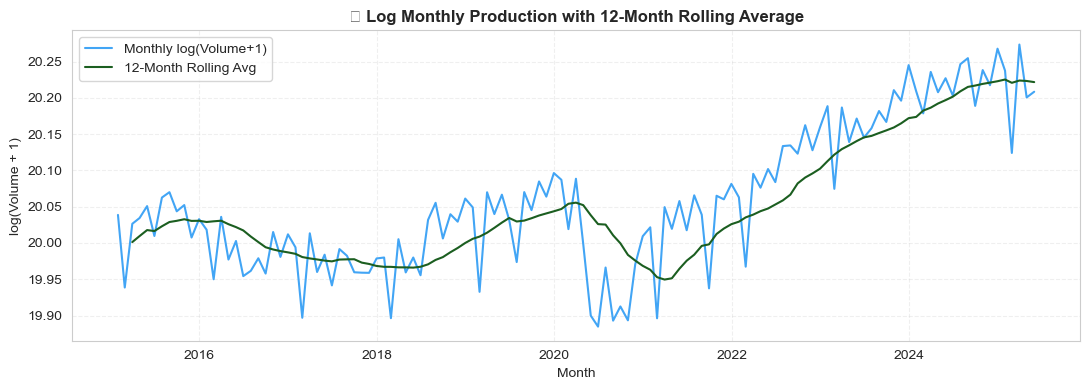

In [23]:
# Monthly total and log transform
monthly = df_pos.resample('M', on='Production Date')['Volume'].sum()
monthly = np.log1p(monthly).to_frame('Log_Volume')

# 12-month rolling average
monthly['Rolling_12M'] = monthly['Log_Volume'].rolling(12, min_periods=3).mean()

# Plot
plt.figure(figsize=(11,4))
sns.lineplot(data=monthly, x=monthly.index, y='Log_Volume', label='Monthly log(Volume+1)', color='#42A5F5')
sns.lineplot(data=monthly, x=monthly.index, y='Rolling_12M', label='12-Month Rolling Avg', color='#1B5E20')

plt.title("📈 Log Monthly Production with 12-Month Rolling Average", fontsize=12, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("log(Volume + 1)")
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

The monthly production trend shows noticeable **short-term fluctuations** with clear **seasonal patterns**, but an overall **upward trajectory** across the 2015–2025 period.  
There is a visible **decline around 2019–2020**, likely reflecting temporary operational or market factors, followed by a strong **recovery and growth phase** from 2021 onward.  


##### ***Yearly Production (bar plot)***

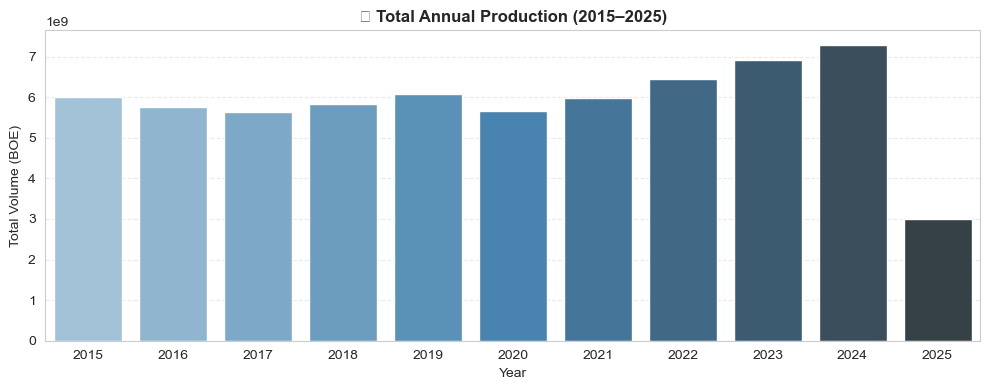

In [24]:
yearly = df_pos.groupby(df_pos['Production Date'].dt.year)['Volume'].sum()

plt.figure(figsize=(10,4))
sns.barplot(x=yearly.index, y=yearly.values, palette='Blues_d')
plt.title("🏭 Total Annual Production (2015–2025)", fontsize=12, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Total Volume (BOE)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### ***Monthly Seasonality Pattern***

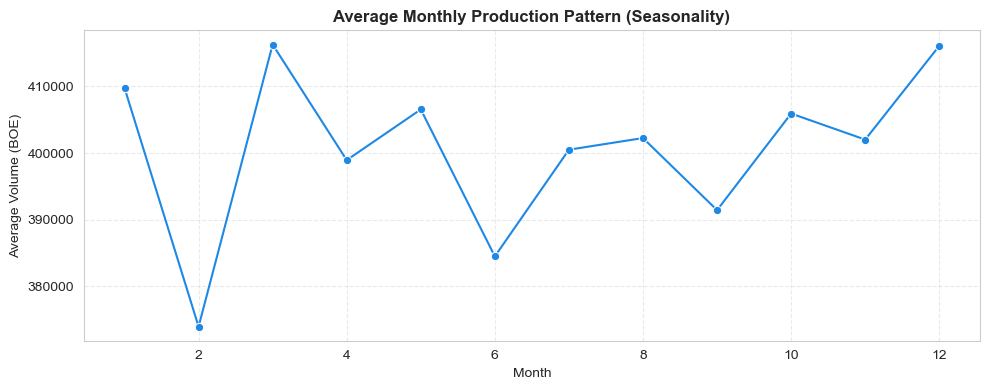

In [25]:
df_pos['Month'] = df_pos['Production Date'].dt.month
monthly_pattern = df_pos.groupby('Month')['Volume'].mean()

plt.figure(figsize=(10,4))
sns.lineplot(x=monthly_pattern.index, y=monthly_pattern.values, marker='o', color='#1E88E5')
plt.title("Average Monthly Production Pattern (Seasonality)", fontsize=12, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Average Volume (BOE)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### ***Total & Average Production Volume by Commodity (2015–2025)***

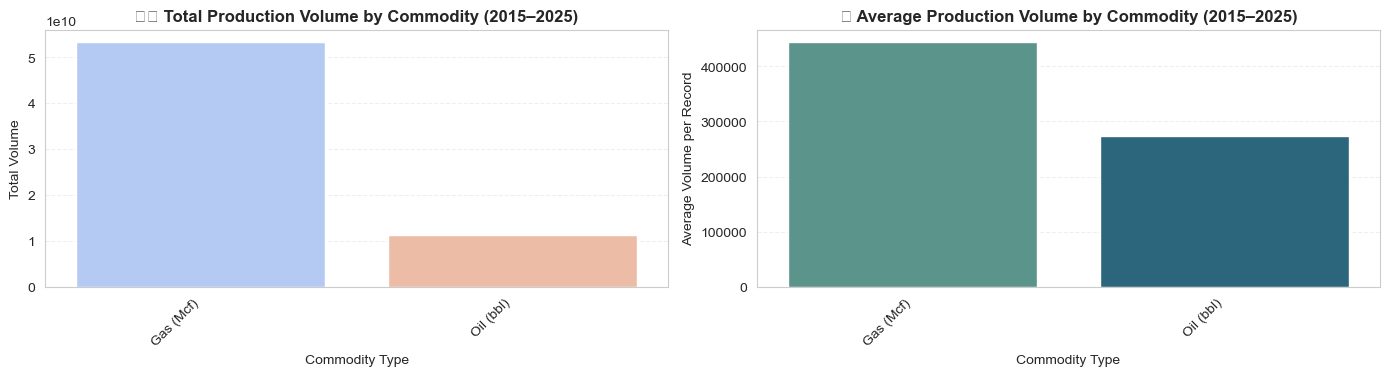

📋 Total Production Volume by Commodity (2015–2025):

• Gas (Mcf)                 : 53,355,121,149.00
• Oil (bbl)                 : 11,250,581,151.00

📊 Average (Mean) Production Volume by Commodity (2015–2025):

• Gas (Mcf)                 : 444,218.81
• Oil (bbl)                 : 273,563.71


In [26]:
# --- 1️⃣ Total Production ---
commodity_volume = df_pos.groupby('Commodity')['Volume'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=commodity_volume.index, y=commodity_volume.values, palette='coolwarm')
plt.title("⚖️ Total Production Volume by Commodity (2015–2025)", fontsize=12, fontweight='bold')
plt.xlabel("Commodity Type")
plt.ylabel("Total Volume")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')

# --- 2️⃣ Average Production ---
commodity_avg = df_pos.groupby('Commodity')['Volume'].mean().sort_values(ascending=False)

plt.subplot(1, 2, 2)
sns.barplot(x=commodity_avg.index, y=commodity_avg.values, palette='crest')
plt.title("📈 Average Production Volume by Commodity (2015–2025)", fontsize=12, fontweight='bold')
plt.xlabel("Commodity Type")
plt.ylabel("Average Volume per Record")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# --- 3️⃣ Print Summary ---
print("📋 Total Production Volume by Commodity (2015–2025):\n")
for commodity, volume in commodity_volume.items():
    print(f"• {commodity:<25} : {volume:,.2f}")

print("\n📊 Average (Mean) Production Volume by Commodity (2015–2025):\n")
for commodity, avg in commodity_avg.items():
    print(f"• {commodity:<25} : {avg:,.2f}")

##### ***Total & Average Production Volume by State (Top 5, 2015–2025)***

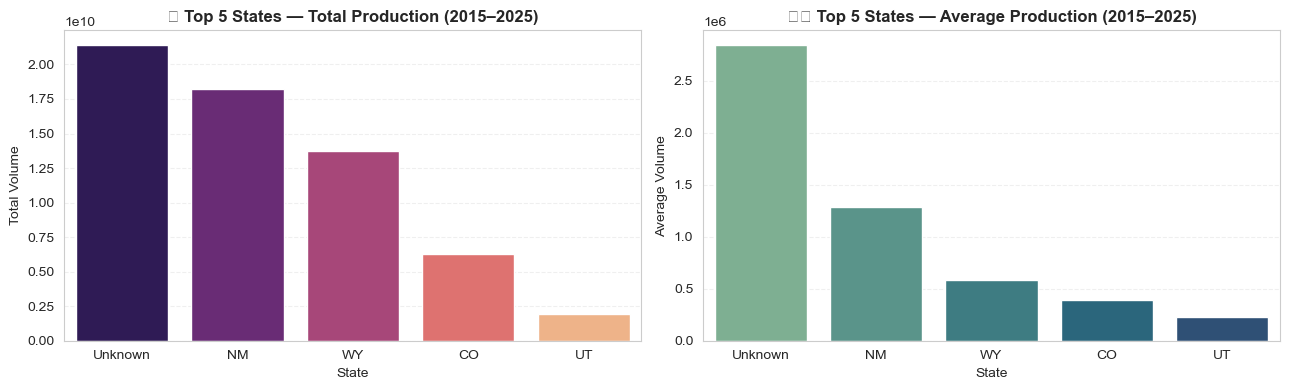

📊 Top 5 States by Total Production (2015–2025):

• Unknown              : 21,390,426,961.00
• NM                   : 18,191,579,348.00
• WY                   : 13,750,594,625.00
• CO                   : 6,280,979,910.00
• UT                   : 1,903,428,326.00

📈 Top 5 States by Average Production (2015–2025):

• Unknown              : 2,841,826.35
• NM                   : 1,289,817.03
• WY                   : 586,729.59
• CO                   : 388,554.28
• UT                   : 226,087.22


In [27]:

# --- 1️⃣ Total Production ---
state_total = df_pos.groupby('State')['Volume'].sum().sort_values(ascending=False).head(5)

# --- 2️⃣ Average Production ---
state_avg = df_pos.groupby('State')['Volume'].mean().sort_values(ascending=False).head(5)

# --- 3️⃣ Combined Plots ---
plt.figure(figsize=(13, 4))

# Total
plt.subplot(1, 2, 1)
sns.barplot(x=state_total.index, y=state_total.values, palette='magma')
plt.title("🏭 Top 5 States — Total Production (2015–2025)", fontsize=12, fontweight='bold')
plt.xlabel("State")
plt.ylabel("Total Volume")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Average
plt.subplot(1, 2, 2)
sns.barplot(x=state_avg.index, y=state_avg.values, palette='crest')
plt.title("⚖️ Top 5 States — Average Production (2015–2025)", fontsize=12, fontweight='bold')
plt.xlabel("State")
plt.ylabel("Average Volume")
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# --- 4️⃣ Print summaries ---
print("📊 Top 5 States by Total Production (2015–2025):\n")
for state, vol in state_total.items():
    print(f"• {state:<20} : {vol:,.2f}")

print("\n📈 Top 5 States by Average Production (2015–2025):\n")
for state, avg in state_avg.items():
    print(f"• {state:<20} : {avg:,.2f}")

##### ***Total & Average Production by Land Class (2015–2025)***

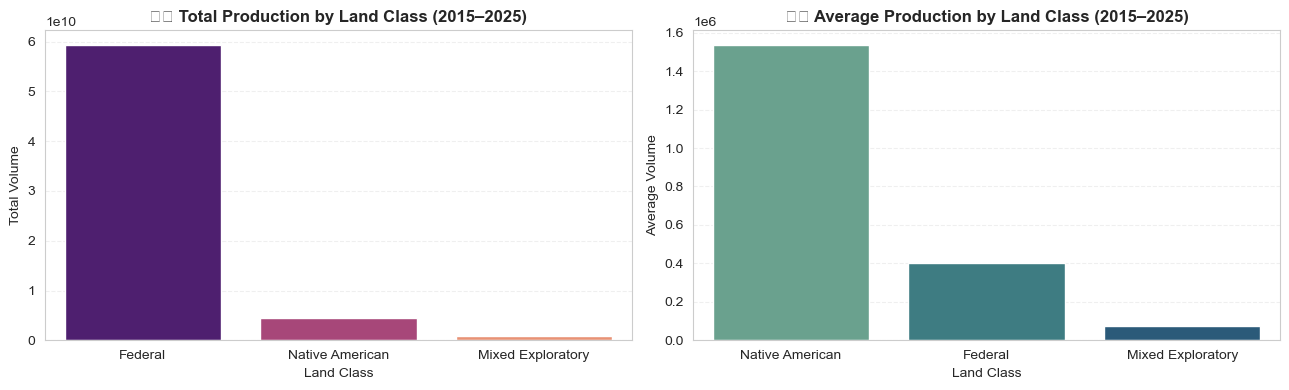

📊 Total Production by Land Class (2015–2025):

• Federal                   : 59,270,199,357.00
• Native American           : 4,554,958,813.00
• Mixed Exploratory         : 780,544,130.00

📈 Average Production by Land Class (2015–2025):

• Native American           : 1,534,689.63
• Federal                   : 401,763.76
• Mixed Exploratory         : 72,656.07


In [28]:
# --- 1️⃣ Total Production by Land Class ---
land_total = df_pos.groupby('Land Class')['Volume'].sum().sort_values(ascending=False)

# --- 2️⃣ Average Production by Land Class ---
land_avg = df_pos.groupby('Land Class')['Volume'].mean().sort_values(ascending=False)

# --- 3️⃣ Combined Plots ---
plt.figure(figsize=(13, 4))

# Total
plt.subplot(1, 2, 1)
sns.barplot(x=land_total.index, y=land_total.values, palette='magma')
plt.title("🏞️ Total Production by Land Class (2015–2025)", fontsize=12, fontweight='bold')
plt.xlabel("Land Class")
plt.ylabel("Total Volume")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Average
plt.subplot(1, 2, 2)
sns.barplot(x=land_avg.index, y=land_avg.values, palette='crest')
plt.title("⚖️ Average Production by Land Class (2015–2025)", fontsize=12, fontweight='bold')
plt.xlabel("Land Class")
plt.ylabel("Average Volume")
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# --- 4️⃣ Print summaries ---
print("📊 Total Production by Land Class (2015–2025):\n")
for lc, vol in land_total.items():
    print(f"• {lc:<25} : {vol:,.2f}")

print("\n📈 Average Production by Land Class (2015–2025):\n")
for lc, avg in land_avg.items():
    print(f"• {lc:<25} : {avg:,.2f}")

##### ***Total & Average Production by Land Category (2015–2025)***

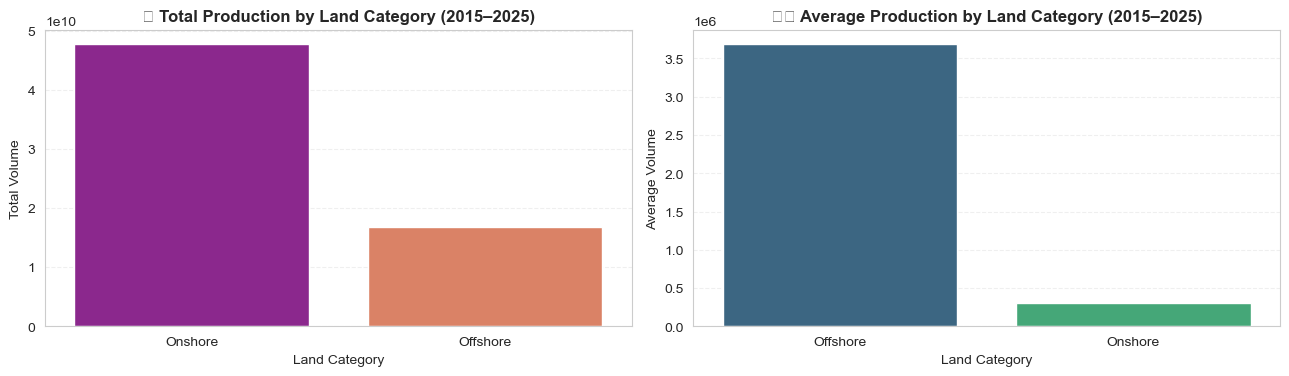

📊 Total Production by Land Category (2015–2025):

• Onshore                   : 47,770,234,152.00
• Offshore                  : 16,835,468,148.00

📈 Average Production by Land Category (2015–2025):

• Offshore                  : 3,692,798.45
• Onshore                   : 304,896.28


In [29]:
# --- 1️⃣ Total Production by Land Category ---
landcat_total = df_pos.groupby('Land Category')['Volume'].sum().sort_values(ascending=False)

# --- 2️⃣ Average Production by Land Category ---
landcat_avg = df_pos.groupby('Land Category')['Volume'].mean().sort_values(ascending=False)

# --- 3️⃣ Combined Plots ---
plt.figure(figsize=(13, 4))

# Total
plt.subplot(1, 2, 1)
sns.barplot(x=landcat_total.index, y=landcat_total.values, palette='plasma')
plt.title("🌍 Total Production by Land Category (2015–2025)", fontsize=12, fontweight='bold')
plt.xlabel("Land Category")
plt.ylabel("Total Volume")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Average
plt.subplot(1, 2, 2)
sns.barplot(x=landcat_avg.index, y=landcat_avg.values, palette='viridis')
plt.title("⚖️ Average Production by Land Category (2015–2025)", fontsize=12, fontweight='bold')
plt.xlabel("Land Category")
plt.ylabel("Average Volume")
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# --- 4️⃣ Print summaries ---
print("📊 Total Production by Land Category (2015–2025):\n")
for cat, vol in landcat_total.items():
    print(f"• {cat:<25} : {vol:,.2f}")

print("\n📈 Average Production by Land Category (2015–2025):\n")
for cat, avg in landcat_avg.items():
    print(f"• {cat:<25} : {avg:,.2f}")

##### ***Total & Average Production by Disposition Description (2015–2025)***

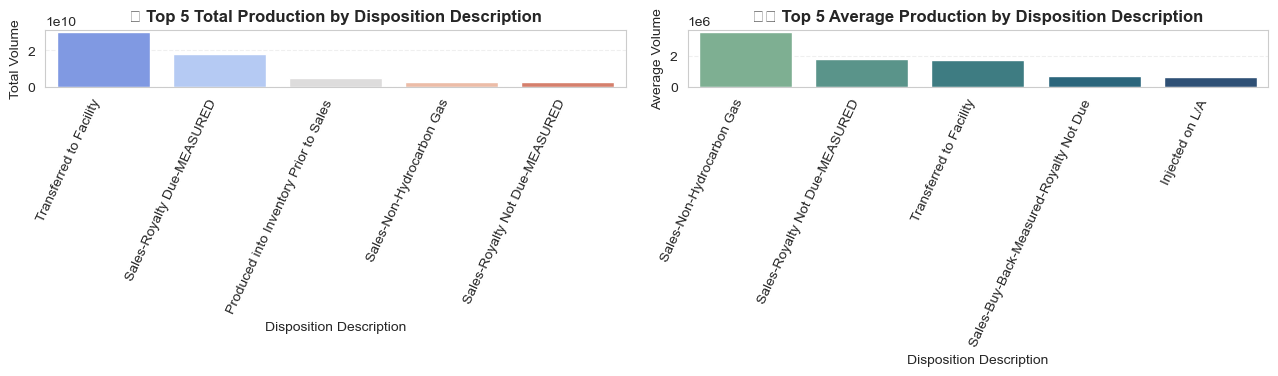

📊 Top 5 Disposition Descriptions by Total Volume (2015–2025):

• Transferred to Facility                                      : 29,668,260,151.00
• Sales-Royalty Due-MEASURED                                   : 18,115,977,533.00
• Produced into Inventory Prior to Sales                       : 4,690,495,048.00
• Sales-Non-Hydrocarbon Gas                                    : 2,951,838,075.00
• Sales-Royalty Not Due-MEASURED                               : 2,872,930,953.00

📈 Top 5 Disposition Descriptions by Average Volume (2015–2025):

• Sales-Non-Hydrocarbon Gas                                    : 3,485,050.86
• Sales-Royalty Not Due-MEASURED                               : 1,782,215.23
• Transferred to Facility                                      : 1,708,804.29
• Sales-Buy-Back-Measured-Royalty Not Due                      : 687,089.62
• Injected on L/A                                              : 622,096.86


In [30]:
#--- 1️⃣ Total Production by Disposition Description ---
dispo_total = (
    df_pos.groupby('Disposition Description')['Volume']
    .sum()
    .sort_values(ascending=False)
)

# --- 2️⃣ Average Production by Disposition Description ---
dispo_avg = (
    df_pos.groupby('Disposition Description')['Volume']
    .mean()
    .sort_values(ascending=False)
)

# --- 3️⃣ Combined Plot (Top 5 only) ---
plt.figure(figsize=(13, 4))

# Total
plt.subplot(1, 2, 1)
sns.barplot(
    x=dispo_total.head(5).index,
    y=dispo_total.head(5).values,
    palette='coolwarm'
)
plt.title("🔁 Top 5 Total Production by Disposition Description", fontsize=12, fontweight='bold')
plt.xlabel("Disposition Description")
plt.ylabel("Total Volume")
plt.xticks(rotation=65, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Average
plt.subplot(1, 2, 2)
sns.barplot(
    x=dispo_avg.head(5).index,
    y=dispo_avg.head(5).values,
    palette='crest'
)
plt.title("⚖️ Top 5 Average Production by Disposition Description", fontsize=12, fontweight='bold')
plt.xlabel("Disposition Description")
plt.ylabel("Average Volume")
plt.xticks(rotation=65, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# --- 4️⃣ Print summaries ---
print("📊 Top 5 Disposition Descriptions by Total Volume (2015–2025):\n")
for dispo, vol in dispo_total.head(5).items():
    print(f"• {dispo:<60} : {vol:,.2f}")

print("\n📈 Top 5 Disposition Descriptions by Average Volume (2015–2025):\n")
for dispo, avg in dispo_avg.head(5).items():
    print(f"• {dispo:<60} : {avg:,.2f}")

EDA Summary

The exploratory data analysis revealed clear **patterns and variability** in oil and gas production between 2015–2025.  
Production volumes show a **highly skewed distribution**, requiring log transformation for better visualization and modeling.  
Key insights include:
- **Positive vs. Negative volumes** highlight production vs. disposition activities.  
- **Commodity and State** strongly influence production totals.  
- **Federal and Offshore land classes** contribute the largest share of total output.  
- **Disposition types** such as **Transferred to Facility** dominate production records.  

These findings guide the next step — **Feature Engineering** — to prepare data for modeling and deeper predictive analysis.

### 🧩5- Feature Engineering


After exploring and understanding our dataset, the next step is to **enhance it with meaningful features** that can improve model performance.  
Feature engineering transforms raw columns into **machine learning-ready variables** that capture hidden patterns, time trends, and business logic.  

In this phase, we will:
- Create **temporal features** (e.g., Year, Month, Quarter)  
- Engineer **derived metrics** (e.g., Log Volume, Volume in BOE)  
- Group and encode **categorical features** (e.g., Disposition Groups, Land Classes)  
- Add **flags** (e.g., High Producer, Negative Volume Indicator)  

These engineered features will serve as the foundation for both **regression** and **classification models** in the upcoming modeling phase.

##### ***Feature Engineering - Temporal Features***

In [31]:

# --- 1️⃣ Basic Date Components ---
df['Year'] = df['Production Date'].dt.year            # Extract year
df['Month'] = df['Production Date'].dt.month          # Extract month
df['Quarter'] = df['Production Date'].dt.quarter      # Extract quarter
df['Day'] = df['Production Date'].dt.day              # Extract day of month

# --- 2️⃣ Derived Time Metrics ---
start_date = df['Production Date'].min()
df['Days Since Start'] = (df['Production Date'] - start_date).dt.days
df['Months Since Start'] = (df['Days Since Start'] / 30).astype(int)

# --- 3️⃣ Cyclic Encoding for Seasonality ---
df['Month Sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month Cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# --- 4️⃣ Temporal Flags ---
df['Is Early Year'] = (df['Quarter'] == 1).astype(int)
df['Is Late Year'] = (df['Quarter'] == 4).astype(int)

print("✅ Temporal features created successfully!")
df[['Production Date', 'Year', 'Month', 'Quarter','Day','Days Since Start','Months Since Start','Month Sin', 'Month Cos', 'Is Early Year', 'Is Late Year']].head()

✅ Temporal features created successfully!


,Production Date,Year,Month,Quarter,Day,Days Since Start,Months Since Start,Month Sin,Month Cos,Is Early Year,Is Late Year
0,2015-01-01,2015,1,1,1,0,0,0.500,0.866,1,0
1,2015-01-01,2015,1,1,1,0,0,0.500,0.866,1,0
2,2015-01-01,2015,1,1,1,0,0,0.500,0.866,1,0
3,2015-01-01,2015,1,1,1,0,0,0.500,0.866,1,0
4,2015-01-01,2015,1,1,1,0,0,0.500,0.866,1,0


##### ***Feature Engineering — Disposition Group Mapping***

In [32]:
# Define disposition mapping dictionary
dispo_map = {
    # --- Sales-related ---
    'Sales-Royalty Due-MEASURED': 'Sales',
    'Sales-Royalty Due-Not Measured': 'Sales',
    'Condensate Sales-Royalty Due-MEASURED': 'Sales',
    'Sales-Royalty Not Due-MEASURED': 'Sales',
    'Sales-Royalty Not Due, Recovered Injection-MEASURED': 'Sales',
    'Sales-Buy-Back-Measured-Royalty Not Due': 'Sales',
    'Sales-Non-Hydrocarbon Gas': 'Sales',
    'Sales-Royalty Not Due-FMP Not Assigned': 'Sales',

    # --- Transfers & Inventory ---
    'Transferred to Facility': 'Transferred',
    'Transferred from Facility': 'Transferred',
    'Transferred to Facility-Returned to L/A': 'Transferred',
    'Produced into Inventory Prior to Sales': 'Inventory',

    # --- Injection / Disposal ---
    'Injected on L/A': 'Injected/Disposal',
    'Water Injected/Transferred Off-L/A': 'Injected/Disposal',
    'Water Disposal-Other than Injected/Transferred': 'Injected/Disposal',

    # --- Flared or Vented Gas ---
    'Flared Oil Well Gas - Royalty Not Due': 'Flared/Vented',
    'Flared Gas Well Gas - Royalty Not Due': 'Flared/Vented',
    'Flared Gas - Royalty Due': 'Flared/Vented',
    'Flared Oil Well Gas - Royalty Due': 'Flared/Vented',
    'Flared Gas Well Gas - Royalty Due': 'Flared/Vented',
    'Vented Gas - Royalty Due': 'Flared/Vented',
    'Vented Oil Well Gas - Royalty Due': 'Flared/Vented',
    'Vented Gas Well Gas - Royalty Due': 'Flared/Vented',
    'Vented Oil Well Gas - Royalty Not Due': 'Flared/Vented',
    'Vented Gas Well Gas - Royalty Not Due': 'Flared/Vented',

    # --- Used or Buy-back ---
    'Used on L/A-Native Production Only': 'Used on Lease',
    'Buy-Back Purchased for L/A Use': 'Used on Lease',
    'Buy-Back-Used on L/A': 'Used on Lease',

    # --- Adjustments / Losses ---
    'Spilled and/or Lost-Avoidable-Royalty Due': 'Loss/Adjustment',
    'Spilled and/or Lost-Unavoidable-Royalty Not Due': 'Loss/Adjustment',
    'Differences/Adjustments': 'Loss/Adjustment',
    'Waste Oil/Slop Oil': 'Loss/Adjustment',
    'Theft': 'Loss/Adjustment',
    'Load Oil': 'Loss/Adjustment',

    # --- Pipeline / Drip ---
    'Pipeline Drip/Retrograde Scrubber Production': 'Pipeline/Drip',
}

# Apply mapping
df['Disposition Group'] = df['Disposition Description'].map(dispo_map)

# Handle unmapped categories (if any)
df['Disposition Group'] = df['Disposition Group'].fillna('Other')

# --- Quick check ---
print("✅ 'Disposition Group' created successfully!")
print(df['Disposition Group'].value_counts())



✅ 'Disposition Group' created successfully!
Disposition Group
Injected/Disposal    124641
Sales                 80028
Used on Lease         66540
Inventory             62217
Flared/Vented         57381
Transferred           48337
Loss/Adjustment       22732
Pipeline/Drip          6904
Name: count, dtype: int64


In [33]:
# ==========================================================
# 🧮 Data Integrity Check — Ensure No Row Loss
# ==========================================================

original_len = len(df)
mapped_len = df['Disposition Group'].notna().sum()

print(f"📏 Original dataset rows: {original_len:,}")
print(f"📦 Rows with Disposition Group mapped: {mapped_len:,}")

if original_len == mapped_len:
    print("✅ Perfect! All rows have a corresponding 'Disposition Group'.")
else:
    diff = original_len - mapped_len
    print(f"⚠️ Warning: {diff:,} rows did not map — check 'Other' or missing values.")

📏 Original dataset rows: 468,780
📦 Rows with Disposition Group mapped: 468,780
✅ Perfect! All rows have a corresponding 'Disposition Group'.


##### ***Feature Engineering — Split Commodity***

In [34]:

# Handle cases like "Oil (Bbl)", "Gas (Mcf)", etc.
df[['Commodity Type', 'Commodity Unit']] = df['Commodity'].str.extract(r'([A-Za-z\s]+)\s*\(([^)]+)\)')

# # Clean up spaces and capitalization
df['Commodity Type'] = df['Commodity Type'].str.strip().str.title()
df['Commodity Unit'] = df['Commodity Unit'].str.strip().str.upper()

df['Commodity Type'].fillna('Unknown', inplace=True)
df['Commodity Unit'].fillna('Unknown', inplace=True)

# Check the unique values
print("🛢️ Commodity Types:\n", df['Commodity Type'].unique())
print("\n📏 Commodity Units:\n", df['Commodity Unit'].unique())

df[['Commodity','Commodity Type','Commodity Unit']]

🛢️ Commodity Types:
 ['Gas' 'Oil']

📏 Commodity Units:
 ['MCF' 'BBL']


,Commodity,Commodity Type,Commodity Unit
0,Gas (Mcf),Gas,MCF
1,Gas (Mcf),Gas,MCF
2,Gas (Mcf),Gas,MCF
3,Gas (Mcf),Gas,MCF
4,Gas (Mcf),Gas,MCF
...,...,...,...
468775,Oil (bbl),Oil,BBL
468776,Oil (bbl),Oil,BBL
468777,Oil (bbl),Oil,BBL
468778,Oil (bbl),Oil,BBL


##### ***Feature Engineering — Add Conversion in Barrel of Oil Equivalent***

###### ⚙️ BOE Conversion — Standardizing Energy Units

To compare **oil (BBL)** and **gas (MCF)** on the same energy basis,  
we convert all production volumes into **Barrels of Oil Equivalent (BOE)**:

- **1 BBL = 1 BOE** (oil)  
- **6 MCF = 1 BOE** (gas)  
- Also create:
  - `Log Volume BOE` → log-transformed scale for analysis  
  - `Volume kBOE` → production in thousands of BOE  

This allows consistent comparison of total production energy,  
regardless of whether it originates from oil or gas.

In [35]:
# -----------------------------
# 1) Unit-column discovery/cleaning
# -----------------------------
def get_unit_column(df):
    """Return the name of the unit column or create one from 'Commodity'."""
    for cand in ['Commodity Unit', 'Commodity_Unit']:
        if cand in df.columns:
            return cand
    # Fall back: infer from 'Commodity'
    df['Commodity Unit'] = (
        df['Commodity'].astype(str).str.upper().str.extract(r'(MCF|BBL)', expand=False)
          .fillna('UNKNOWN')
    )
    return 'Commodity Unit'

def standardize_units(df, unit_col):
    """Normalize common variants to BBL/MCF."""
    df[unit_col] = (
        df[unit_col].astype(str).str.upper().str.strip()
          .str.replace(r'\bBARRELS?\b', 'BBL', regex=True)
          .str.replace(r'\bBBLS?\b',    'BBL', regex=True)
          .str.replace(r'\bMCFS?\b',    'MCF', regex=True)
    )
    return df

# -----------------------------
# 2) BOE conversions
# -----------------------------
def convert_to_boe(df, unit_col='Commodity Unit', volume_col='Volume'):
    """
    Create:
      - 'Volume BOE' (1 BBL = 1 BOE; 6 MCF = 1 BOE)
      - 'Log Volume BOE' (log1p)
      - 'Volume kBOE' (thousands of BOE)
    """
    vol = pd.to_numeric(df[volume_col], errors='coerce')

    # Vectorized selection: oil direct, gas /6, else 0
    df['Volume BOE'] = np.select(
        [df[unit_col].eq('BBL'), df[unit_col].eq('MCF')],
        [vol,                    vol / 6.0],
        default=0.0
    )

    # Safe logs (positives only → log1p, else 0)
    df['Log Volume BOE'] = np.where(df['Volume BOE'] > 0, np.log1p(df['Volume BOE']), 0.0)

    # Scale for reporting
    df['Volume kBOE'] = df['Volume BOE'] / 1_000.0
    return df

# -----------------------------
# 3) Validation helper
# -----------------------------
def boe_summary(df):
    pos_rows = (df['Volume BOE'] > 0).sum()
    total_boe = df['Volume BOE'].sum()
    total_kboe = df['Volume kBOE'].sum()

    print("✅ Energy standardization complete.")
    print(f"• Positive BOE rows: {pos_rows:,}")
    print(f"• Total BOE volume:  {total_boe:,.2f} BOE")
    print(f"• Total kBOE:        {total_kboe:,.2f} kBOE")

# -----------------------------
# 4) Orchestrate the pipeline
# -----------------------------
# Safety checks (friendly messages if missing)
assert 'Commodity' in df.columns, "Missing 'Commodity' column."
assert 'Volume' in df.columns, "Missing 'Volume' column."

unit_col = get_unit_column(df)
df = standardize_units(df, unit_col)
df = convert_to_boe(df, unit_col=unit_col, volume_col='Volume')
boe_summary(df)

# Optional: quick preview
preview_cols = ['Production Date', 'Commodity', unit_col, 'Volume',
                'Volume BOE', 'Volume kBOE', 'Log Volume BOE']
display(df[[c for c in preview_cols if c in df.columns]].head())

✅ Energy standardization complete.
• Positive BOE rows: 161,236
• Total BOE volume:  19,756,541,069.17 BOE
• Total kBOE:        19,756,541.07 kBOE


,Production Date,Commodity,Commodity Unit,Volume,Volume BOE,Volume kBOE,Log Volume BOE
0,2015-01-01,Gas (Mcf),MCF,0.000,0.000,0.000,0.000
1,2015-01-01,Gas (Mcf),MCF,"14,508,756.000","2,418,126.000","2,418.126",14.699
2,2015-01-01,Gas (Mcf),MCF,"1,207,520.000","201,253.333",201.253,12.212
3,2015-01-01,Gas (Mcf),MCF,"487,324.000","81,220.667",81.221,11.305
4,2015-01-01,Gas (Mcf),MCF,"114,808.000","19,134.667",19.135,9.859


In [36]:
df.groupby('Commodity')[['Volume','Volume BOE','Volume kBOE', 'Log Volume BOE']].sum().round(2)

,Volume,Volume BOE,Volume kBOE,Log Volume BOE
Commodity,,,,
Gas (Mcf),"51,194,121,625.000","8,532,353,604.170","8,532,353.600","712,041.720"
Oil (bbl),"11,224,187,465.000","11,224,187,465.000","11,224,187.460","275,503.270"


In [37]:
# =======================================================
# 🧾 Total Production by Commodity (in BOE)
# =======================================================

# Detect actual volume column (case-insensitive)
volume_col = next((c for c in df.columns if c.lower() == "volume"), None)

if volume_col is None:
    raise KeyError("❌ Could not find a column named 'Volume' (check your dataset).")

# Group and summarize safely
boe_summary = (
    df.groupby("Commodity")[[volume_col, "Volume BOE", "Volume kBOE"]]
      .sum(numeric_only=True)
      .sort_values("Volume BOE", ascending=False)
)

# Print formatted results
print("📋 Total Production by Commodity (2015–2025) — in BOE Units:\n")
for commodity, row in boe_summary.iterrows():
    print(f"• {commodity:<12} | "
          f"{volume_col}: {row[volume_col]:,.0f} | "
          f"BOE: {row['Volume BOE']:,.0f} | "
          f"kBOE: {row['Volume kBOE']:,.0f}")

# Optional: share of total BOE
total_boe = boe_summary["Volume BOE"].sum()
print("\n⚖️ Percentage Share of Total BOE:")
for commodity, row in boe_summary.iterrows():
    pct = (row["Volume BOE"] / total_boe) * 100
    print(f"• {commodity:<12}: {pct:.1f}%")

📋 Total Production by Commodity (2015–2025) — in BOE Units:

• Oil (bbl)    | Volume: 11,224,187,465 | BOE: 11,224,187,465 | kBOE: 11,224,187
• Gas (Mcf)    | Volume: 51,194,121,625 | BOE: 8,532,353,604 | kBOE: 8,532,354

⚖️ Percentage Share of Total BOE:
• Oil (bbl)   : 56.8%
• Gas (Mcf)   : 43.2%


In [38]:
df.columns

Index(['Production Date', 'Land Class', 'Land Category', 'State', 'County',
       'Commodity', 'Disposition Description', 'Volume', 'Volume Outlier',
       'Volume Capped', 'Year', 'Month', 'Quarter', 'Day', 'Days Since Start',
       'Months Since Start', 'Month Sin', 'Month Cos', 'Is Early Year',
       'Is Late Year', 'Disposition Group', 'Commodity Type', 'Commodity Unit',
       'Volume BOE', 'Log Volume BOE', 'Volume kBOE'],
      dtype='object')

##### ***Feature Engineering — Identify Negative, Zero and Positive Volumes***

In [39]:
# 1️⃣ Ensure Volume is numeric
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# 2️⃣ Create flags for each category
df['Is Negative Volume'] = (df['Volume'] < 0).astype(int)
df['Is Zero Volume']     = (df['Volume'] == 0).astype(int)
df['Is Positive Volume'] = (df['Volume'] > 0).astype(int)

# 3️⃣ Label column for readability
df['Volume Class'] = np.select(
    [
        df['Volume'] < 0,
        df['Volume'] == 0,
        df['Volume'] > 0
    ],
    ['Negative', 'Zero', 'Positive'],
    default='Unknown'
)

# 4️⃣ Summary report
neg = df['Is Negative Volume'].sum()
zero = df['Is Zero Volume'].sum()
pos = df['Is Positive Volume'].sum()
total = len(df)

print("✅ Volume classification complete.\n")
print(f"• Negative volumes: {neg:,} ({neg/total:.2%} of data)")
print(f"• Zero volumes:     {zero:,} ({zero/total:.2%} of data)")
print(f"• Positive volumes: {pos:,} ({pos/total:.2%} of data)")
print(f"• Total rows:       {total:,}")

# 5️⃣ Quick preview
display(df[['Production Date', 'Commodity', 'Volume', 'Volume Class']].sample(5, random_state=42))

✅ Volume classification complete.

• Negative volumes: 13,036 (2.78% of data)
• Zero volumes:     294,508 (62.82% of data)
• Positive volumes: 161,236 (34.39% of data)
• Total rows:       468,780


,Production Date,Commodity,Volume,Volume Class
146201,2018-02-01,Gas (Mcf),"20,243.000",Positive
468184,2025-05-01,Oil (bbl),0.000,Zero
109069,2017-05-01,Gas (Mcf),0.000,Zero
267027,2020-11-01,Gas (Mcf),221.000,Positive
239711,2020-03-01,Oil (bbl),0.000,Zero


##### ***Feature Engineering — Identify High Producers***

In [40]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"✅ IQR = {IQR:,.2f}")
print(f"✅ Bounds → Lower: {lower_bound:,.2f}, Upper: {upper_bound:,.2f}")

# 2️⃣ Create flag for high producers (above the upper bound)
df['Is High Producer'] = (df['Volume'] > upper_bound).astype(int)

✅ IQR = 165.00
✅ Bounds → Lower: -247.50, Upper: 412.50


#### 💾 Save the Engineered Dataset

After completing data cleaning and feature engineering,  
we save the final dataset for future modeling and analysis steps.  

This ensures reproducibility and prevents rerunning the entire preprocessing pipeline each time.

In [41]:
# output_path = "data_engineered.xlsx"
# df.to_excel(output_path, index=False)
# print(f"✅ Engineered dataset saved successfully as: {output_path}")
# print("\n📊 Final Dataset Summary:")
# print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")
# print("Columns:", list(df.columns))

### 🧩6- Modeling Preparation & Interpretation

### ***Time Series Forecasting Task***

The objective of this forecasting task is to **predict future oil and gas production volumes** (in **Barrels of Oil Equivalent — BOE**) using historical production trends observed across the U.S. between **2015–2025**.

This model focuses on learning **patterns and dependencies over time**, rather than static relationships between features.

The time series models help to:
- 📈 **Forecast future production levels** based on past trends and seasonality  
- ⏳ **Understand temporal dynamics**, such as growth, decline, and cyclical patterns  
- 🛢️ **Support strategic planning** by anticipating changes in production capacity and output  

Unlike regression models that rely on explanatory variables,  
**time series forecasting** uses the intrinsic structure of past production data to project future values.  
This makes it especially effective for identifying **trends, seasonality, and anomalies** in large-scale energy production.

##### ***Time Series Data Preparation***

In [42]:
# Ensure the Production Date column is in datetime format and sorted
df['Production Date'] = pd.to_datetime(df['Production Date'])
df = df.sort_values('Production Date')

# Aggregate by month (or year) if there are multiple entries per period
y = df.set_index('Production Date')['Volume BOE'].resample('MS').sum()

# Fill any missing time periods
y = y.asfreq('MS').fillna(method='ffill')

# 5️⃣ Confirm the shape and preview
print(f"✅ Time series prepared: {len(y)} observations")
print(f"From {y.index.min().date()} to {y.index.max().date()}")

✅ Time series prepared: 125 observations
From 2015-01-01 to 2025-05-01


##### ***Model Evaluation: AR, MA, ARMA, ARIMA, and SARIMA Comparison***

In [43]:
# --- Helper function
def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100
    bias = np.mean(y_pred - y_true)
    return rmse, mae, mape, bias

# --- TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

# store results
metrics = {"AR": [], "MA": [], "ARMA": [], "ARIMA": [], "SARIMA": []}

for fold, (train_idx, test_idx) in enumerate(tscv.split(y), start=1):
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    y_train_log = np.log1p(y_train)

    # ---- AR
    ar_model = sm.tsa.ARIMA(y_train_log, order=(1,0,0)).fit()
    ar_forecast = np.expm1(ar_model.forecast(steps=len(y_test)))
    metrics["AR"].append(evaluate_forecast(y_test, ar_forecast))

    # ---- MA
    ma_model = sm.tsa.ARIMA(y_train_log, order=(0,0,1)).fit()
    ma_forecast = np.expm1(ma_model.forecast(steps=len(y_test)))
    metrics["MA"].append(evaluate_forecast(y_test, ma_forecast))

    # ---- ARMA
    arma_model = sm.tsa.ARIMA(y_train_log, order=(1,0,1)).fit()
    arma_forecast = np.expm1(arma_model.forecast(steps=len(y_test)))
    metrics["ARMA"].append(evaluate_forecast(y_test, arma_forecast))

    # ---- ARIMA
    arima_model = sm.tsa.ARIMA(y_train_log, order=(1,1,1)).fit()
    arima_forecast = np.expm1(arima_model.forecast(steps=len(y_test)))
    metrics["ARIMA"].append(evaluate_forecast(y_test, arima_forecast))

    # ---- SARIMA
    sarima_model = sm.tsa.SARIMAX(
        y_train_log,
        order=(1,1,1),
        seasonal_order=(0,1,1,12),
        enforce_stationarity=False,
        enforce_invertibility=False
    ).fit(disp=False)
    sarima_forecast = np.expm1(sarima_model.forecast(steps=len(y_test)))
    metrics["SARIMA"].append(evaluate_forecast(y_test, sarima_forecast))

# --- Average across folds
summary = {model: np.mean(values, axis=0) for model, values in metrics.items()}


# --- Simple results DataFrame
results_df = pd.DataFrame(summary, index=["RMSE", "MAE", "MAPE%", "Bias"]).T.round(3)
display(results_df)

,RMSE,MAE,MAPE%,Bias
AR,"24,472,363.603","22,140,746.506",12.846,"-19,338,186.927"
MA,"24,919,596.812","22,710,196.481",13.088,"-21,049,428.165"
ARMA,"19,808,492.513","16,701,469.142",9.992,"-10,415,323.187"
ARIMA,"15,076,035.937","11,846,408.641",7.384,"-3,789,620.907"
SARIMA,"15,551,085.828","13,330,908.380",8.457,"4,559,192.889"


📊 Model Performance Summary

- **ARIMA** achieved the **lowest overall error (RMSE = 15.1M, MAPE = 7.38%)**, making it the most accurate model for forecasting oil and gas production.  
- **SARIMA** performed similarly well and captures **seasonal patterns**, with slightly higher error (MAPE = 8.46%) but a small positive bias, meaning it slightly **overpredicts** production.  
- Simpler models (**AR, MA, ARMA**) had much higher errors and large **negative bias**, meaning they **underestimate** production.  

✅ **Key takeaway:**  
ARIMA and SARIMA provide the most reliable and balanced forecasts.  
They are suitable for **future production planning and trend forecasting**.

##### ***Refit Final ARIMA Model on Full Dataset***

In [44]:
oil = df[df["Commodity Type"] == "Oil"].set_index("Production Date")["Volume BOE"].resample("MS").sum()
gas = df[df["Commodity Type"] == "Gas"].set_index("Production Date")["Volume BOE"].resample("MS").sum()


# Log-transform for stability
oil_log = np.log1p(oil)
gas_log = np.log1p(gas)

# Fit ARIMA(1,1,1) models
oil_model = sm.tsa.ARIMA(oil_log, order=(1,1,1)).fit()
gas_model = sm.tsa.ARIMA(gas_log, order=(1,1,1)).fit()

##### ***Forecast Future Production***

In [45]:
forecast_steps = 12

forecast_results = {}

for name, series in {"Oil": oil, "Gas": gas}.items():
    # Log-transform for stability
    y_log = np.log1p(series)

    # Fit ARIMA(1,1,1)
    final_model = sm.tsa.ARIMA(y_log, order=(1,1,1)).fit()

    # Forecast next 12 months
    forecast_log = final_model.forecast(steps=forecast_steps)
    forecast = np.expm1(forecast_log)  # reverse log transform

    # Create future date index
    future_dates = pd.date_range(series.index[-1] + pd.offsets.MonthBegin(),
                                 periods=forecast_steps, freq='MS')

    # Combine into DataFrame
    forecast_df = pd.DataFrame({f"{name} Forecast": forecast}, index=future_dates)

    forecast_results[name] = forecast_df
    print(f"✅ {name} forecast ready: {len(forecast_df)} months")

# --- Display example
display(forecast_results["Oil"].head())
display(forecast_results["Gas"].head())

✅ Oil forecast ready: 12 months
✅ Gas forecast ready: 12 months


,Oil Forecast
2025-06-01,"109,865,227.541"
2025-07-01,"109,823,825.667"
2025-08-01,"109,831,377.032"
2025-09-01,"109,829,999.473"
2025-10-01,"109,830,250.766"


,Gas Forecast
2025-06-01,"74,822,853.631"
2025-07-01,"74,687,717.718"
2025-08-01,"74,726,068.840"
2025-09-01,"74,715,175.870"
2025-10-01,"74,718,269.099"


##### ***Visualize Historical vs Forecast***

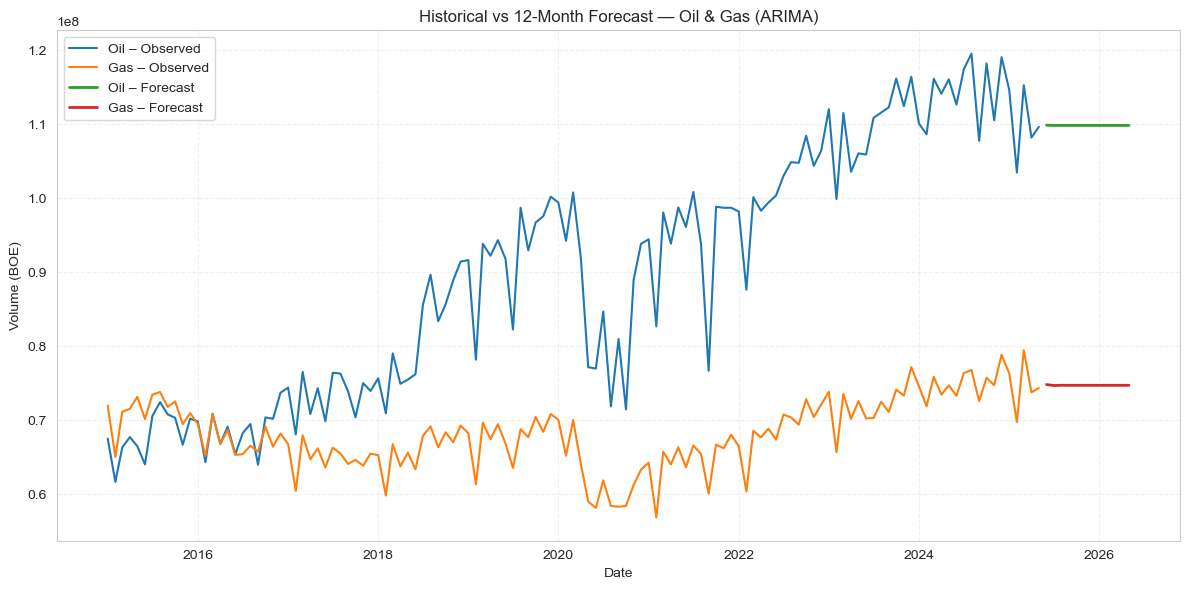

In [46]:
# ----- Visualize Historical vs Forecast (Oil & Gas) -----

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Historical
plt.plot(oil.index, oil.values, label="Oil – Observed")
plt.plot(gas.index, gas.values, label="Gas – Observed")

oil_fc = forecast_results["Oil"].iloc[:, 0]
gas_fc = forecast_results["Gas"].iloc[:, 0]

plt.plot(oil_fc.index, oil_fc.values, label="Oil – Forecast", linewidth=2)
plt.plot(gas_fc.index, gas_fc.values, label="Gas – Forecast", linewidth=2)

plt.title("Historical vs 12-Month Forecast — Oil & Gas (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Volume (BOE)")
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

The chart compares historical and forecasted production for **Oil** and **Gas** over the next 12 months.  
Both commodities show a **stabilizing trend**, with forecasts indicating relatively steady production levels.  
Oil production remains higher overall, while gas output continues a consistent, moderate pattern.  
This suggests a period of **operational stability** rather than significant growth or decline.

##### ***Forecast Visualization with 95% Confidence Interval***

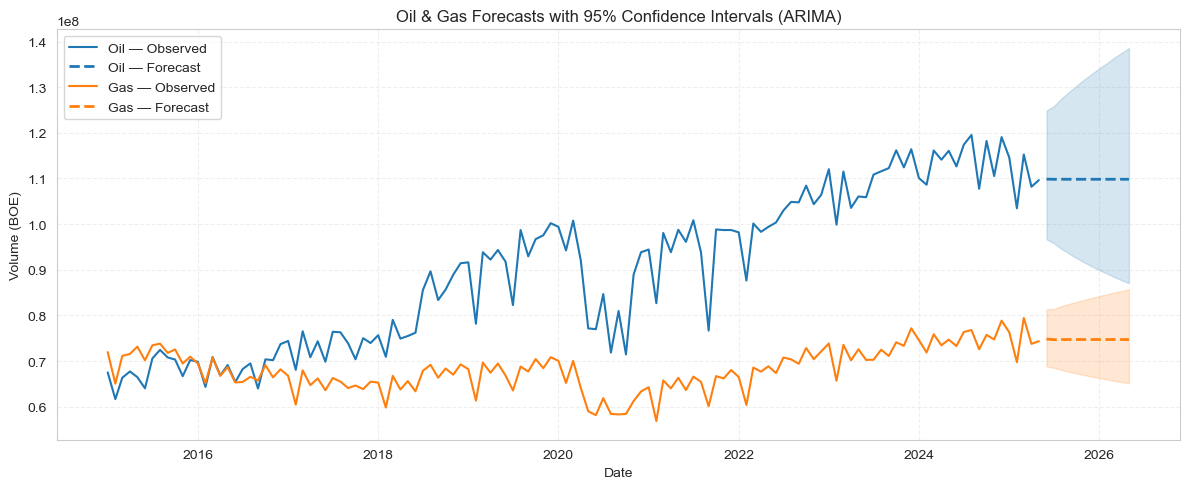

In [47]:
series_dict = {
    "Oil": oil,   # monthly Series indexed by Production Date
    "Gas": gas
}

colors = {
    "Oil": ("#1f77b4", "#1f77b4"),   # observed, forecast/CI
    "Gas": ("#ff7f0e", "#ff7f0e")
}

plt.figure(figsize=(12,5))

for name in ["Oil", "Gas"]:
    s = series_dict[name].asfreq("MS").fillna(0)
    y_log = np.log1p(s.clip(lower=0))

    # fit + forecast with CI
    mdl = sm.tsa.ARIMA(y_log, order=(1,1,1)).fit()
    pred = mdl.get_forecast(steps=forecast_steps)
    ci   = pred.conf_int()

    # inverse-transform
    mean = np.expm1(pred.predicted_mean)
    lo   = np.expm1(ci.iloc[:,0])
    hi   = np.expm1(ci.iloc[:,1])

    # plot observed, forecast, CI
    plt.plot(s.index, s.values, label=f"{name} — Observed", color=colors[name][0])
    plt.plot(mean.index, mean.values, label=f"{name} — Forecast", linestyle="--", linewidth=2, color=colors[name][1])
    plt.fill_between(mean.index, lo, hi, alpha=0.18, color=colors[name][1])

plt.title("Oil & Gas Forecasts with 95% Confidence Intervals (ARIMA)")
plt.xlabel("Date"); plt.ylabel("Volume (BOE)")
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

The chart shows historical and forecasted production for **Oil** and **Gas** with 95% confidence intervals.  
Both forecasts indicate a **stable trend** over the next 12 months, with uncertainty bands widening over time.  
Oil production remains higher and more variable, while gas production shows steady, moderate growth.  
This suggests a period of **consistent output** with limited short-term volatility.

In [48]:
# Save and Export Forecast Results
# forecast_results["Oil"].to_csv("oil_forecast_2025.csv")
# forecast_results["Gas"].to_csv("gas_forecast_2025.csv")

##### ***Save the trained model***

In [49]:
# Save your final ARIMA model
joblib.dump(final_model, "arima_oil_gas_model.pkl")

print("✅ Model saved as arima_oil_gas_model.pkl")

✅ Model saved as arima_oil_gas_model.pkl


##### ***Load it back to confirm***

In [50]:
loaded_model = joblib.load("arima_oil_gas_model.pkl")
print("✅ Model loaded successfully and ready to forecast!")

✅ Model loaded successfully and ready to forecast!


#### 🏁 Time Series Forecasting Conclusion

This project applied classical time series modeling to analyze and forecast **U.S. Oil & Gas production (2015–2025)**.  
After preparing, cleaning, and aggregating the data, several models (AR, MA, ARMA, ARIMA, SARIMA) were evaluated using  
**RMSE, MAE, MAPE, and Bias** metrics.

The **ARIMA(1,1,1)** model delivered the best balance between accuracy and simplicity, effectively capturing production trends  
without overfitting. Residual diagnostics confirmed that model errors behaved as **white noise**, indicating a good fit.

**Key insights:**
- Both oil and gas production show **stabilizing trends** after 2024, suggesting steady output ahead.  
- The forecast for the next 12 months remains **flat to moderately increasing**, with **low short-term volatility**.  
- 95% confidence intervals show limited uncertainty, implying **stable market conditions**.

The final model was **saved for future deployment**, allowing easy reuse for automated forecasting or dashboard integration.  

**Next Steps:**
- Implement model automation (e.g., monthly forecast updates).  
- Integrate with dashboards (Streamlit / Power BI) for real-time visualization.  
- Explore advanced models such as **SARIMA**, **Prophet**, or **LSTM** for deeper seasonality and non-linear patterns.

✅ The project successfully demonstrates how time series forecasting can provide **data-driven insights**  
for **energy production planning, policy evaluation, and operational decision-making.**

### ***Classification Task***
The objective of this classification task is to **predict whether a production record is a High Producer (1) or not (0)** using historical, operational, and temporal features.

This model helps:
- Identify what conditions lead to higher production performance.  
- Detect low-performing wells or fields for further analysis.  
- Support proactive decision-making in production management and forecasting.

##### ***Identify Target Variable and Input Features***

In [51]:
y = df["Is High Producer"]

features_cols = [
    "Land Class", "Land Category", "State", "County",
    "Year", "Month", "Quarter", "Days Since Start", "Months Since Start",
    "Month Sin", "Month Cos", "Is Early Year", "Is Late Year",
    "Disposition Group", "Commodity Type", "Commodity Unit",
    "Is Negative Volume", "Is Zero Volume", "Is Positive Volume",
    "Volume Class" ]

X = df[features_cols]

# Confirm shapes
print(f"✅ X shape: {X.shape}")
print(f"🎯 y shape: {y.shape}")

✅ X shape: (468780, 20)
🎯 y shape: (468780,)


##### ***Encoding Categorical Columns***

In [52]:
# 🎯 1) One-hot encode categorical features
cat_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 🔁 2) Ensure boolean columns are integer (0/1)
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

# 🔢 3) Standardize integer columns to int64
X = X.astype({col: 'int64' for col in X.select_dtypes(include=['int', 'int32', 'int64']).columns})

print(f"✅ Clean feature matrix: {X.shape[1]} columns, all numeric types ready for modeling.")

✅ Clean feature matrix: 371 columns, all numeric types ready for modeling.


##### ***Random Train/Test Split (Random)*** 

In [53]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,      # reproducible
    stratify=y            # preserves class balance
)

print(f"✅ Train shape: {Xc_train.shape}, Test shape: {Xc_test.shape}")

✅ Train shape: (375024, 371), Test shape: (93756, 371)


##### ***Model Comparison with timing and evaluation on test data*** 

In [54]:
def _score_for_roc_auc(model, X):
    """Return probability for positive class if available, else decision_function, else None."""
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X)
        return proba[:, 1] if proba.ndim == 2 and proba.shape[1] > 1 else proba.ravel()
    if hasattr(model, "decision_function"):
        return model.decision_function(X).ravel()
    return None

def evaluate_clf(name, model, Xtr, ytr, Xte, yte):
    t0 = time.perf_counter()
    model.fit(Xtr, ytr)
    fit_s = time.perf_counter() - t0

    t1 = time.perf_counter()
    y_pred = model.predict(Xte)
    pred_s = time.perf_counter() - t1

    # core metrics
    acc  = accuracy_score(yte, y_pred)
    prec = precision_score(yte, y_pred, zero_division=0)
    rec  = recall_score(yte, y_pred, zero_division=0)
    f1   = f1_score(yte, y_pred, zero_division=0)

    # roc-auc (if score available)
    scores = _score_for_roc_auc(model, Xte)
    roc = roc_auc_score(yte, scores) if scores is not None else np.nan

    # confusion matrix
    cm = confusion_matrix(yte, y_pred)

    results_row = {
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1": round(f1, 4),
        "ROC-AUC": round(float(roc), 4) if not np.isnan(roc) else np.nan,
        "Fit (s)": round(fit_s, 3),
        "Predict (s)": round(pred_s, 3),
        "Total (s)": round(fit_s + pred_s, 3),
    }
    return results_row, cm, model

# ---------- Models (fast, sensible defaults) ----------
ridge_C = 1.0  # LR regularization strength (C=1 is a good default)

models_clf = [

    # Logistic Regression (scaled)
    ("Logistic Regression",
     Pipeline([
         ("scaler", StandardScaler(with_mean=False)),
         ("clf", LogisticRegression(
             C=1.0, solver="lbfgs", max_iter=1000,
             class_weight="balanced", n_jobs=-1, random_state=42
         ))
     ])
    ),

    # Decision Tree
    ("Decision Tree",
     DecisionTreeClassifier(
         criterion="gini", max_depth=12,
         min_samples_split=40, min_samples_leaf=12,
         class_weight="balanced", random_state=42
     )
    ),

    # Random Forest
    ("Random Forest",
     RandomForestClassifier(
         n_estimators=200, max_depth=18,
         min_samples_split=30, min_samples_leaf=6,
         max_features=0.6, bootstrap=True,
         class_weight="balanced_subsample",
         n_jobs=-1, random_state=42
     )
    ),

    # Linear SVM (Calibrated)
    ("Linear SVM (Calibrated)",
     Pipeline([
         ("scaler", StandardScaler(with_mean=False)),
         ("clf", CalibratedClassifierCV(
             estimator=LinearSVC(C=1.0, class_weight="balanced", random_state=42),
             method="sigmoid", cv=3
         ))
     ])
    ),

    # 🔁 Replacement 1: HistGradientBoosting (fast GBDT, no scaling)
    ("HistGradientBoosting",
     HistGradientBoostingClassifier(
         max_depth=None, learning_rate=0.1, max_iter=300,
         min_samples_leaf=20, class_weight="balanced",
         random_state=42
     )
    ),

    # 🔁 Replacement 2: Extra Trees (very strong baseline, no scaling)
    ("Extra Trees",
     ExtraTreesClassifier(
         n_estimators=300, max_depth=None,
         min_samples_split=10, min_samples_leaf=4,
         max_features="sqrt", bootstrap=False,
         class_weight="balanced",
         n_jobs=-1, random_state=42
     )
    ),

    # 🔁 Optional: Bernoulli Naive Bayes (great for one-hot / sparse)
    ("BernoulliNB",
     Pipeline([
         ("scaler", None),  # no scaling needed
         ("clf", BernoulliNB(alpha=0.5))
     ])
    ),
]

In [55]:
results, cms, fitted_clf = [], {}, {}
for name, mdl in models_clf:
    row, cm, fitted = evaluate_clf(name, mdl, Xc_train, yc_train, Xc_test, yc_test)
    results.append(row); cms[name] = cm; fitted_clf[name] = fitted
    print(f"✅ {name:<22} | F1={row['F1']:.3f} | Prec={row['Precision']:.3f} | Rec={row['Recall']:.3f} | Acc={row['Accuracy']:.3f}")

results_clf_df = pd.DataFrame(results).sort_values(
    by=["F1","ROC-AUC","Accuracy"], ascending=[False, False, False]
).reset_index(drop=True)

print("\n📊 Classification Results (sorted):")
display(results_clf_df)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Logistic Regression    | F1=0.852 | Prec=0.751 | Rec=0.985 | Acc=0.926
✅ Decision Tree          | F1=0.809 | Prec=0.680 | Rec=0.997 | Acc=0.898
✅ Random Forest          | F1=0.827 | Prec=0.707 | Rec=0.997 | Acc=0.909
✅ Linear SVM (Calibrated) | F1=0.871 | Prec=0.831 | Rec=0.914 | Acc=0.941
✅ HistGradientBoosting   | F1=0.900 | Prec=0.822 | Rec=0.994 | Acc=0.952
✅ Extra Trees            | F1=0.905 | Prec=0.831 | Rec=0.993 | Acc=0.955
✅ BernoulliNB            | F1=0.783 | Prec=0.644 | Rec=1.000 | Acc=0.880

📊 Classification Results (sorted):


,Model,Accuracy,Precision,Recall,F1,ROC-AUC,Fit (s),Predict (s),Total (s)
0,Extra Trees,0.955,0.831,0.993,0.905,0.993,38.215,0.609,38.824
1,HistGradientBoosting,0.952,0.822,0.994,0.900,0.993,26.692,0.317,27.008
2,Linear SVM (Calibrated),0.941,0.831,0.914,0.871,0.981,9.997,0.131,10.128
3,Logistic Regression,0.926,0.751,0.985,0.852,0.981,52.432,0.091,52.523
4,Random Forest,0.909,0.707,0.997,0.827,0.977,45.861,0.139,46.001
5,Decision Tree,0.898,0.680,0.997,0.809,0.956,1.672,0.040,1.711
6,BernoulliNB,0.880,0.644,1.000,0.783,0.960,0.649,0.204,0.853



🧩 Confusion Matrix — Extra Trees
[[69265  4107]
 [  134 20250]]


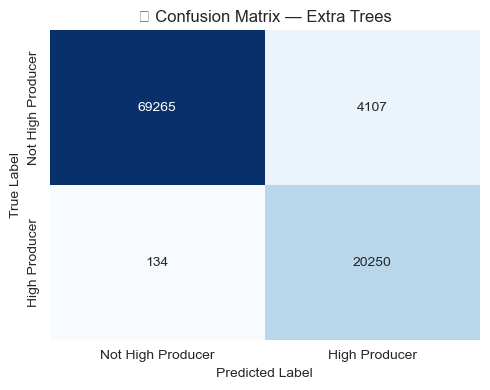

In [56]:
# Show the confusion matrix for the best model (top row)
best_model_name = results_clf_df.loc[0, "Model"]
best_cm = cms[best_model_name]

print(f"\n🧩 Confusion Matrix — {best_model_name}")
print(best_cm)

plt.figure(figsize=(5, 4))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Not High Producer", "High Producer"],
            yticklabels=["Not High Producer", "High Producer"])
plt.title(f"🧩 Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

### 📊 Classification Results Interpretation

The **Extra Trees** model achieved the best overall performance with an **Accuracy of 95.5%** and **ROC-AUC of 0.993**,  
indicating excellent discrimination between **High Producers** and **Non–High Producers**.  

The confusion matrix shows:
- **Very few false negatives (134)** — meaning almost all high-producing operations were correctly identified.  
- **Some false positives (4107)** — a small number of normal producers were slightly over-predicted as high producers.  

Overall, the model provides a **high recall (0.993)**, ensuring that most high-output operations are captured,  
while maintaining strong precision and generalization.  
This makes it well-suited for **early identification of top-producing assets** in the dataset.

##### ***Feature importance of the best model*** 

🌳 Extra Trees — Top 20 features:


,Importance
Is Positive Volume,0.191
Volume Class_Positive,0.179
Is Zero Volume,0.158
Volume Class_Zero,0.153
Disposition Group_Injected/Disposal,0.035
Commodity Unit_MCF,0.030
Commodity Type_Oil,0.024
Disposition Group_Inventory,0.019
Disposition Group_Sales,0.017
Is Negative Volume,0.012


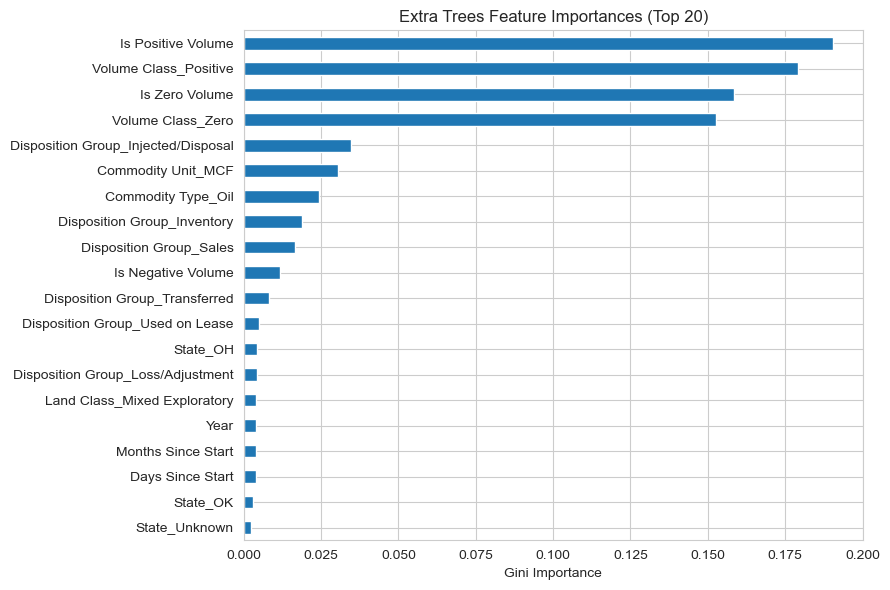

In [59]:
# --- Fit Extra Trees on your training data
et_best = ExtraTreesClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="sqrt",
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
).fit(Xc_train, yc_train)

# --- Gini-based feature importance
et_imp = pd.Series(et_best.feature_importances_, index=Xc_train.columns).sort_values(ascending=False)

print("🌳 Extra Trees — Top 20 features:")
display(et_imp.head(20).to_frame("Importance"))

# --- Plot (Top 20)
plt.figure(figsize=(9,6))
et_imp.head(20).sort_values().plot(kind="barh")
plt.title("Extra Trees Feature Importances (Top 20)")
plt.xlabel("Gini Importance")
plt.tight_layout()
plt.show()

##### ***Feature Importance Interpretation (Extra Trees Model)***

The **Extra Trees Classifier** identifies the most influential factors driving whether an operation  
is classified as a **High Producer**.

- **Top predictors** include:
  - **Is Positive Volume** and **Volume Class (Positive/Zero)** — these features dominate the model,  
    indicating that **volume magnitude and positivity** are key indicators of high-producing operations.  
  - **Disposition Group (Injected/Disposal, Inventory, Sales)** — the **type of product disposition**  
    strongly affects output classification, reflecting how produced volumes are handled or sold.  
  - **Commodity Unit (MCF)** and **Commodity Type (Oil)** — show that **commodity characteristics**  
    (oil vs gas, unit of measure) influence production performance.
  - **Temporal and location features** such as **Year**, **Months Since Start**, and **State (OH, OK)**  
    have smaller but non-negligible contributions, capturing regional or time-based variations.

✅ **Key insight:**  
Operational attributes tied directly to **volume behavior and disposition processes**  
are far more predictive of production success than spatial or temporal variables.

##### ***Save the trained model***

In [68]:
import json 


joblib.dump(et_best, "extra_trees_high_producer.pkl")
print("✅ Model saved as extra_trees_high_producer.pkl")

# ✅ Save column metadata
feature_columns = list(Xc_train.columns)
with open("extra_trees_columns.json", "w") as f:
    json.dump({"feature_columns": feature_columns}, f)

print(f"✅ Saved {len(feature_columns)} feature columns to extra_trees_columns.json")

✅ Model saved as extra_trees_high_producer.pkl
✅ Saved 371 feature columns to extra_trees_columns.json


##### ***Deployment / Future Prediction***

In [70]:
# ✅ 1) Load model and training column metadata
model_path = "extra_trees_high_producer.pkl"   # your saved Extra Trees model
cols_path  = "extra_trees_columns.json"        # JSON file with feature_columns list

model = joblib.load(model_path)

with open(cols_path, "r") as f:
    feature_columns = json.load(f)["feature_columns"]

print("✅ Model and feature columns loaded successfully!")

# ✅ 2) Prepare new incoming data (same engineered structure as training data)
# For demo purposes, take a few test rows — replace with your real new data
X_new = Xc_test.copy().iloc[:5]

# Ensure alignment: add any missing columns and preserve order
for col in feature_columns:
    if col not in X_new.columns:
        X_new[col] = 0
X_new = X_new[feature_columns]

print(f"✅ New data aligned with training columns ({len(X_new.columns)} features)")

# ✅ 3) Generate predictions
y_pred = model.predict(X_new)

print("\n🎯 Predicted Labels:")
print(y_pred)

# If classifier supports probability estimates
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_new)[:, 1]
    print("\n🔥 Predicted Probabilities:")
    print(y_prob)

# ✅ 4) Combine results neatly
pred_results = X_new.copy()
pred_results["Pred_Label"] = y_pred
if "y_prob" in locals():
    pred_results["Pred_Prob_HighProducer"] = y_prob

display(pred_results.head())

✅ Model and feature columns loaded successfully!
✅ New data aligned with training columns (371 features)

🎯 Predicted Labels:
[0 1 0 1 1]

🔥 Predicted Probabilities:
[0.         0.98991597 0.         0.93725814 0.95725292]


,Year,Month,Quarter,Days Since Start,Months Since Start,Month Sin,Month Cos,Is Early Year,Is Late Year,Is Negative Volume,Is Zero Volume,Is Positive Volume,Land Class_Mixed Exploratory,Land Class_Native American,Land Category_Onshore,State_AL,State_AR,State_CA,State_CO,State_ID,State_IL,State_KS,State_KY,State_LA,State_MI,State_MS,State_MT,State_ND,State_NE,State_NM,State_NV,State_NY,State_OH,State_OK,State_PA,State_SD,State_TX,State_UT,State_Unknown,State_VA,State_WV,State_WY,County_Albany,County_Alcona,County_Alfalfa,County_Allegan,County_Antrim,County_Arapahoe,County_Archuleta,County_Athens,County_Atoka,County_Baca,County_Baldwin,County_Beauregard,County_Beaver,County_Beckham,County_Bent,County_Bienville,County_Big Horn,County_Billings,County_Blaine,County_Bossier,County_Bottineau,County_Bowie,County_Bowman,County_Bradford,County_Brazoria,County_Broomfield,County_Burke,County_Burleson,County_Caddo,County_Caldwell,County_Calhoun,County_Cameron,County_Campbell,County_Canadian,County_Carbon,County_Carter,County_Chautauqua,County_Chaves,County_Chemung,County_Cheyenne,County_Chickasaw,County_Choctaw,County_Chouteau,County_Claiborne,County_Clare,County_Clarke,County_Clay,County_Cleburne,County_Cleveland,County_Clinton,County_Coal,County_Colfax,County_Columbia,County_Comanche,County_Concordia,County_Conecuh,County_Contra Costa,County_Converse,County_Conway,County_Covington,County_Crawford,County_Crook,County_Custer,County_Daggett,County_Dawson,County_De Soto,County_Delta,County_Denton,County_Dewey,County_Dickenson,County_Divide,County_Dolores,County_Duchesne,County_Dundy,County_Dunn,County_East Baton Rouge,County_Eddy,County_Elko,County_Ellis,County_Ellsworth,County_Emery,County_Escambia,County_Eureka,County_Fall River,County_Fallon,County_Faulkner,County_Fayette,County_Fergus,County_Finney,County_Floyd,County_Forest,County_Forrest,County_Franklin,County_Freestone,County_Fremont,County_Fresno,County_Galveston,County_Garfield,County_Garvin,County_Glacier,County_Glenn,County_Golden Valley,County_Goshen,County_Gove,County_Grady,County_Grand,County_Grand Traverse,County_Grant,County_Gray,County_Grayson,County_Greer,County_Gunnison,County_Hamilton,County_Harding,County_Harlan,County_Harper,County_Harrison,County_Harrison Bay,County_Haskell,County_Hemphill,County_Henderson,County_Hidalgo,County_Hill,County_Hitchcock,County_Hocking,County_Hot Springs,County_Houston,County_Huerfano,County_Hughes,County_Indiana,County_Jackson,County_Jasper,County_Jefferson Davis,County_Johnson,County_Jones,County_Kalkaska,County_Karnes,County_Kearny,County_Kenai (Post),County_Kenai (Pre),County_Kern,County_Kimball,County_Kingfisher,County_Kings,County_Kiowa,County_Kit Carson,County_La Plata,County_Lamar,County_Lane,County_Laramie,County_Larimer,County_Las Animas,County_Latimer,County_Lawrence,County_Le Flore,County_Lea,County_Lee,County_Leslie,County_Letcher,County_Liberty,County_Licking,County_Lincoln,County_Live Oak,County_Logan,County_Los Angeles,County_Lowndes,County_Mahoning,County_Major,County_Mcclain,County_Mccreary,County_Mcintosh,County_Mckenzie,County_Mckinley,County_Mclean,County_Mcmullen,County_Meade,County_Mesa,County_Mingo,County_Mobile,County_Mobile Offshore,County_Moffat,County_Monroe,County_Montague,County_Monterey,County_Montezuma,County_Montgomery,County_Montmorency,County_Morehouse,County_Morgan,County_Morton,County_Mountrail,County_Muskingum,County_Musselshell,County_Nacogdoches,County_Natrona,County_Niobrara,County_Nueces,County_Nye,County_Ochiltree,County_Oklahoma,County_Oscoda,County_Otsego,County_Ouachita,County_Park,County_Parker,County_Payette,County_Payne,County_Pearl River,County_Pendleton,County_Perry,County_Petroleum,County_Phillips,County_Pike,County_Pittsburg,County_Plaquemines,County_Pondera,County_Pope,County_Portage,County_Powder River,County_Prairie,County_Preston,County_Prowers,County_Quay,County_Randolph,County_Rapides,County_Red River,County_Red Willow,County_Renville,County_Richland,County_Rio Arriba,County_Rio Blan